In [1]:
from cygnss_wetlands.enums import AggregationMethod, GridType
from cygnss_wetlands.cygnss.aggregate import drop_in_bucket, get_nearby_gridcells, haversine
from cygnss_wetlands.grids.ease import EASE2GRID
from cygnss_wetlands.cygnss.reader import CONFIG, CYGNSS_DATA_DIR, CygnssL1Reader

import numpy as np
import datetime 
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Create our reader object

# Note: ingestion is a lot faster if we limit it to a smaller geopgraphic area of interest
# (this is optional! The default is the full extent of CYGNSS mission range)
PACAYA_SAMIRIA_BBOX = (-77, -7, -73, -3) # xmin, ymin, xmax, ymax
reader = CygnssL1Reader(bbox=PACAYA_SAMIRIA_BBOX, near_land=True)

100%|█████████████████████████████████████████████| 8/8 [00:01<00:00,  4.33it/s]


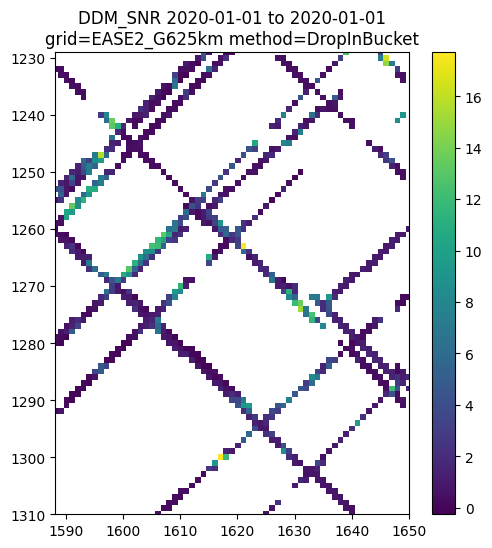

In [3]:
# Read in 1-days's worth of data, post to 9km grid
grid = EASE2GRID(GridType.EASE2_G625km)
d1 = datetime.datetime(2020,1,1)
d2 = datetime.datetime(2020,1,1)

aggregation_method = AggregationMethod.DropInBucket
snr = reader.aggregate(
    variable_name="ddm_snr", 
    grid=grid, 
    start_date=d1, end_date=d2, 
    method=aggregation_method
)

# Plot
bbox_grid_xmin, bbox_grid_ymin = grid.lonlat2cr(reader.xmin, reader.ymin)
bbox_grid_xmax, bbox_grid_ymax = grid.lonlat2cr(reader.xmax, reader.ymax)

fig, ax = plt.subplots(figsize=(6,6))
pos = ax.imshow(snr)
fig.colorbar(pos, ax=ax)
ax.set_title(f"DDM_SNR {d1.strftime('%Y-%m-%d')} to {d2.strftime('%Y-%m-%d')}\n"\
             f"grid={grid.name} method={aggregation_method.name}")
ax.set_xlim(bbox_grid_xmin, bbox_grid_xmax)
ax.set_ylim(bbox_grid_ymin, bbox_grid_ymax)
plt.show()

100%|█████████████████████████████████████████████| 8/8 [00:01<00:00,  4.31it/s]
/Users/kjensen/workspace/kat/cygnss-wetlands/cygnss_wetlands/cygnss/aggregate.py:144: RuntimeWarning: invalid value encountered in divide
  aggregated_grid = sum_grid / count_grid


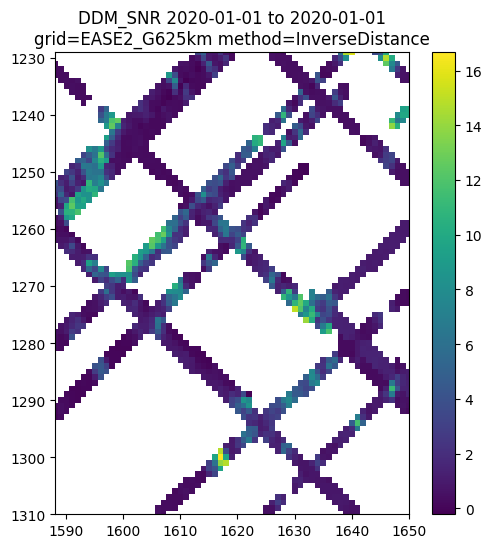

In [4]:
# Read in 1-days's worth of data, post to 9km grid
grid = EASE2GRID(GridType.EASE2_G625km)
d1 = datetime.datetime(2020,1,1)
d2 = datetime.datetime(2020,1,1)

aggregation_method = AggregationMethod.InverseDistance
snr = reader.aggregate(
    variable_name="ddm_snr", 
    grid=grid, 
    start_date=d1, end_date=d2, 
    method=aggregation_method
)

# Plot
bbox_grid_xmin, bbox_grid_ymin = grid.lonlat2cr(reader.xmin, reader.ymin)
bbox_grid_xmax, bbox_grid_ymax = grid.lonlat2cr(reader.xmax, reader.ymax)

fig, ax = plt.subplots(figsize=(6,6))
pos = ax.imshow(snr)
fig.colorbar(pos, ax=ax)
ax.set_title(f"DDM_SNR {d1.strftime('%Y-%m-%d')} to {d2.strftime('%Y-%m-%d')}\n"\
             f"grid={grid.name} method={aggregation_method.name}")
ax.set_xlim(bbox_grid_xmin, bbox_grid_xmax)
ax.set_ylim(bbox_grid_ymin, bbox_grid_ymax)
plt.show()

100%|███████████████████████████████████████████| 40/40 [00:09<00:00,  4.27it/s]
/Users/kjensen/workspace/kat/cygnss-wetlands/cygnss_wetlands/cygnss/aggregate.py:144: RuntimeWarning: invalid value encountered in divide
  aggregated_grid = sum_grid / count_grid


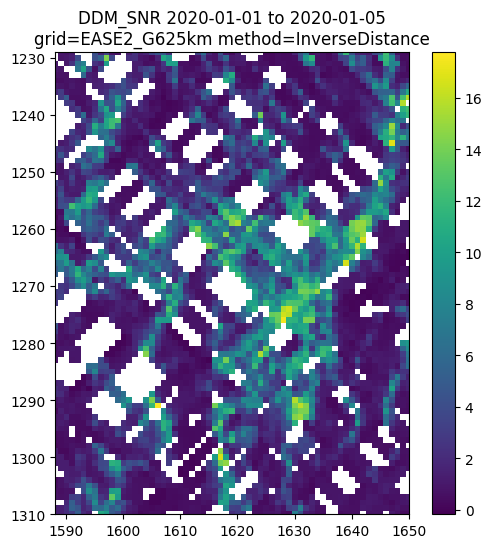

In [5]:
# Read in 1-days's worth of data, post to 9km grid
grid = EASE2GRID(GridType.EASE2_G625km)
d1 = datetime.datetime(2020,1,1)
d2 = datetime.datetime(2020,1,5)

aggregation_method = AggregationMethod.InverseDistance
snr = reader.aggregate(
    variable_name="ddm_snr", 
    grid=grid, 
    start_date=d1, end_date=d2, 
    method=aggregation_method
)

# Plot
bbox_grid_xmin, bbox_grid_ymin = grid.lonlat2cr(reader.xmin, reader.ymin)
bbox_grid_xmax, bbox_grid_ymax = grid.lonlat2cr(reader.xmax, reader.ymax)

fig, ax = plt.subplots(figsize=(6,6))
pos = ax.imshow(snr)
fig.colorbar(pos, ax=ax)
ax.set_title(f"DDM_SNR {d1.strftime('%Y-%m-%d')} to {d2.strftime('%Y-%m-%d')}\n"\
             f"grid={grid.name} method={aggregation_method.name}")
ax.set_xlim(bbox_grid_xmin, bbox_grid_xmax)
ax.set_ylim(bbox_grid_ymin, bbox_grid_ymax)
plt.show()